##  Exploratory Data Analysis

In any Data Science project, the first step is to perform <b>Exploratory Data Analysis</b> (EDA) on the dataset. EDA is the first step for us to begin understanding the dataset and in doing so, answer some of the common assumptions we have of our data so that we are able to understand how to better prepare it for further analysis.

We will be doing the following steps in our EDA:

1. Read File
2. Preview Data
3. Clean Data
4. Explore with Questions
5. Visualise

## Lazada Dataset
<img src="https://s.yimg.com/ny/api/res/1.2/_qLpCqbdgKq0nnY3UDmI2w--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9NzQ0O2g9Mzcy/http://media.zenfs.com/en/homerun/feed_manager_auto_publish_494/87db61c8ea6d6fcc4122595bb0c0c2c5" width="400">

This dataset has been source from the Lazada marketplace, where we have above <b>36 thousand rows</b> of data to work with. <b>Each row represents one product</b>. Opening this file in Microsoft Excel would look like this:

<img src="https://i.imgur.com/E0QJP92.png">

We're going to do some simple analysis with these products and see what we can come up with.

<h2>Step 1: Reading the Lazada Dataset </h2>

### Practice 1
Just as you did in your recap, read the `lazada_data.csv` file in to a list of dictionaries and store them in to a variable called `lazada_data`.

In [4]:
import csv
import pprint
with open('lazada_data.csv', newline='') as f:
    lazada_data = []
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        lazada_data.append(dict(row))

print(lazada_data[:3])

[{'country': 'my', 'sku_id': 'AD674FAASTLXANMY', 'title': 'Adana Gallery Suri Square Hijab – Light Pink', 'category_lvl_1': 'Fashion', 'category_lvl_2': 'Women', 'category_lvl_3': 'Muslim Wear', 'short_description': '<ul><li>Material : Non sheer shimmer chiffon</li><li>Sizes : 52 x 52 inches OR 56 x 56 inches</li><li>Cut\xa0with curved ends</li></ul>', 'price': '49', 'product_type': 'local'}, {'country': 'my', 'sku_id': 'AE068HBAA3RPRDANMY', 'title': 'Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz', 'category_lvl_1': 'Health & Beauty', 'category_lvl_2': 'Bath & Body', 'category_lvl_3': 'Hand & Foot Care', 'short_description': 'Formulated with oil-free hydrating botanicals/ Remarkably improves skin texture of abused hands/Restores soft smooth & refined hands', 'price': '128', 'product_type': 'international'}, {'country': 'my', 'sku_id': 'AN680ELAA9VN57ANMY', 'title': 'Andoer 150cm Cellphone Smartphone Mini Dual-Headed Omni-Directional Mic Microphone with Collar Clip for iPad iPhone5 

<h2>Step 2: Preview Data </h2>

As you might have seen in all the lab exercises, we've always previewed the data. This step is crucial because it allows us to first visually understand what is going on with our data, if there is any problems with it and if so, how we can go about tackling these issues.

Previewing this data would give you something that looks like this:
```python
    {
        'country': 'my',
        'sku_id': 'AD674FAASTLXANMY',
        'title': 'Adana Gallery Suri Square Hijab – Light Pink',
        'category_lvl_1': 'Fashion',
        'category_lvl_2': 'Women',
        'category_lvl_3': 'Muslim Wear',
        'short_description': '<ul><li>Material : Non sheer shimmer chiffon</li><li>Sizes : 52 x 52 inches OR 56 x 56 inches</li><li>Cut\xa0with curved ends</li></ul>',
        'price': '49',
        'product_type': 'local'
    }
```

In [5]:
pprint.pprint(lazada_data[:2])

[{'category_lvl_1': 'Fashion',
  'category_lvl_2': 'Women',
  'category_lvl_3': 'Muslim Wear',
  'country': 'my',
  'price': '49',
  'product_type': 'local',
  'short_description': '<ul><li>Material : Non sheer shimmer '
                       'chiffon</li><li>Sizes : 52 x 52 inches OR 56 x 56 '
                       'inches</li><li>Cut\xa0with curved ends</li></ul>',
  'sku_id': 'AD674FAASTLXANMY',
  'title': 'Adana Gallery Suri Square Hijab – Light Pink'},
 {'category_lvl_1': 'Health & Beauty',
  'category_lvl_2': 'Bath & Body',
  'category_lvl_3': 'Hand & Foot Care',
  'country': 'my',
  'price': '128',
  'product_type': 'international',
  'short_description': 'Formulated with oil-free hydrating botanicals/ '
                       'Remarkably improves skin texture of abused '
                       'hands/Restores soft smooth & refined hands',
  'sku_id': 'AE068HBAA3RPRDANMY',
  'title': 'Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz'}]


<h2>Step 3: Data Cleaning </h2>
As you've might observed, after previewing the data, we've realised some issues. In any Data Science project, data cleaning can take up to <b>80%</b> of the project time because of the numerous special cases you need to be aware of and <i>clean</i> them up for you to be able to use them.

After previewing the data, we've observed the following issues with the Lazada dataset. They are the following:

1. The `price` column is a `string`
2. The `title` column has special characters like ()<> and so on
3. The `short_description` column has special characters like ()<> and so on

#### Practice 2
We're going to practice some simple data cleaning. The other 2 issues have been resolved for you. Your job is simple:

1. Clean the `price` column

Our primary goal is to turn what we saw in the preview earlier and turn our dictionaries to this :
```python
    {
        'country': 'my', 
        'sku_id': 'AD674FAASTLXANMY', 
        'title': 'Adana Gallery Suri Square Hijab   Light Pink', 
        'category_lvl_1': 'Fashion', 
        'category_lvl_2': 'Women', 
        'category_lvl_3': 'Muslim Wear', 
        'short_description': 'Material : Non sheer shimmer chiffon  Sizes : 52 x 52 inches OR 56 x 56 inches  Cut\xa0with curved ends', 
        'price': 49.0, 
        'product_type': 'local'
    }
```

In [6]:
import re


for product in lazada_data:

    product['price'] = float(product['price'])
    
    text = re.sub('[^0-9a-zA-Z]',' ',product['title'])    
    
    product['title'] = text.strip()    

    regex = re.compile('<.*?>')
    text = regex.sub(' ',product['short_description'])
    product['short_description'] = text.strip()

pprint.pprint(lazada_data[:2])

[{'category_lvl_1': 'Fashion',
  'category_lvl_2': 'Women',
  'category_lvl_3': 'Muslim Wear',
  'country': 'my',
  'price': 49.0,
  'product_type': 'local',
  'short_description': 'Material : Non sheer shimmer chiffon  Sizes : 52 x 52 '
                       'inches OR 56 x 56 inches  Cut\xa0with curved ends',
  'sku_id': 'AD674FAASTLXANMY',
  'title': 'Adana Gallery Suri Square Hijab   Light Pink'},
 {'category_lvl_1': 'Health & Beauty',
  'category_lvl_2': 'Bath & Body',
  'category_lvl_3': 'Hand & Foot Care',
  'country': 'my',
  'price': 128.0,
  'product_type': 'international',
  'short_description': 'Formulated with oil-free hydrating botanicals/ '
                       'Remarkably improves skin texture of abused '
                       'hands/Restores soft smooth & refined hands',
  'sku_id': 'AE068HBAA3RPRDANMY',
  'title': 'Cuba Heartbreaker Eau De Parfum Spray 100ml 3 3oz'}]


<h2>Step 4: Explore with Questions </h2>

Now that our data is cleaned, we can ask some simple questions of our data. Recall, our dataset now looks like this for 1 item:
```python
    {
        'country': 'my', 
        'sku_id': 'AD674FAASTLXANMY', 
        'title': 'Adana Gallery Suri Square Hijab   Light Pink', 
        'category_lvl_1': 'Fashion', 
        'category_lvl_2': 'Women', 
        'category_lvl_3': 'Muslim Wear', 
        'short_description': 'Material : Non sheer shimmer chiffon  Sizes : 52 x 52 inches OR 56 x 56 inches  Cut\xa0with curved ends', 
        'price': 49.0, 
        'product_type': 'local'
    }
```

### Practice 3
#### Question 1

How many items are more than $50?

<b>Expected Output:</b>

    The number of items with price greater than $50 is: 21135

In [6]:
num_items_greater_than_50 = 0

#write your code here below
for row in lazada_data:
    price = row['price']
    if price > 50:
        num_items_greater_than_50 += 1
print('The number of items with price greater than $50 is: ' + str(num_items_greater_than_50))

The number of items with price greater than $50 is: 21135


#### Question 2

How many items are listed in <b>Singapore</b>, <b>Malaysia</b>, <b>Phillippines</b>?


<b>Expected Output:</b>

    SG:  8638
    MY:  16413
    PH:  11232
    

In [7]:
sg_items = 0
my_items = 0
ph_items = 0

#write your code here below
for row in lazada_data:
    country = row['country']
    if country == 'sg':
        sg_items += 1
    elif country == 'my':
        my_items += 1
    elif country == 'ph':
        ph_items += 1
print('SG: ' + str(sg_items))
print('MY: ' + str(my_items))
print('PH: ' + str(ph_items))

SG: 8638
MY: 16413
PH: 11232


#### Question 3

For the `category_1` of `Fashion`, how many items are for `Men` and how many items are for `Women`?

<b>Expected Output:</b>

    Male Fashion: 1609
    Women Fashion: 3944
    

In [8]:
fashion_men = 0
fashion_women = 0

#write your code here below
for row in lazada_data:
    cat1 = row['category_lvl_1']
    cat2 = row['category_lvl_2']
    if cat1 == 'Fashion':
        if cat2 == 'Men':
            fashion_men += 1
        if cat2 == 'Women':
            fashion_women += 1
print('Male Fashion: ' + str(fashion_men))
print('Women Fashion: ' + str(fashion_women))

Male Fashion: 1609
Women Fashion: 3944


<h2>Step 5: Visualise </h2>

Visualisations is a powerful tool in understanding. Provides us with a visual representation to some of the answers we might have of our data. Some of the common visualistions we can use are:

1. Bar Charts
2. Scatter Plots
3. Histogram 

and many more...

In order to do any of these visualisations, we need to prepare the data we need for these.

### Practice 4

#### Question 1
Using counting with dictionaries, find the number of items `category_lvl_1` items there are in Singapore and store it in `SG_Products`.

<b>Expected Output:</b>
   
       {
           'Computers & Laptops': 698,
           'TV Audio / Video Gaming & Wearables': 593,
           'Fashion': 1352,
           'Mobiles & Tablets': 1407,
           'Health & Beauty': 1010,
           'Home & Living': 1563,
           'Watches Sunglasses Jewellery': 1069,
           'Home Appliances': 434,
           'Cameras': 512
       }

In [9]:
SG_Products = {}
for row in lazada_data:
    country = row['country']
    product = row['category_lvl_1']
    if country == 'sg':
        if product not in SG_Products:
            SG_Products[product] = 1
        else:
            SG_Products[product] += 1
pprint.pprint(SG_Products)

{'Cameras': 512,
 'Computers & Laptops': 698,
 'Fashion': 1352,
 'Health & Beauty': 1010,
 'Home & Living': 1563,
 'Home Appliances': 434,
 'Mobiles & Tablets': 1407,
 'TV Audio / Video Gaming & Wearables': 593,
 'Watches Sunglasses Jewellery': 1069}


#### Question 2
Using what you've done in Question 1, apply this for both Malaysia and Phillippines and store them in `MY_Products` and `PH_Products`, respectively.

In [10]:
MY_Products = {}
for row in lazada_data:
    country = row['country']
    product = row['category_lvl_1']
    if country == 'my':
        if product not in MY_Products:
            MY_Products[product] = 1
        else:
            MY_Products[product] += 1
pprint.pprint(MY_Products)

{'Cameras': 832,
 'Computers & Laptops': 1452,
 'Fashion': 2539,
 'Health & Beauty': 1790,
 'Home & Living': 2595,
 'Home Appliances': 633,
 'Mobiles & Tablets': 3666,
 'TV Audio / Video Gaming & Wearables': 1018,
 'Watches Sunglasses Jewellery': 1888}


In [11]:
PH_Products = {}
for row in lazada_data:
    country = row['country']
    product = row['category_lvl_1']
    if country == 'ph':
        if product not in PH_Products:
            PH_Products[product] = 1
        else:
            PH_Products[product] += 1
pprint.pprint(PH_Products)

{'Cameras': 608,
 'Computers & Laptops': 775,
 'Fashion': 1838,
 'Health & Beauty': 1240,
 'Home & Living': 1890,
 'Home Appliances': 518,
 'Mobiles & Tablets': 2204,
 'TV Audio / Video Gaming & Wearables': 900,
 'Watches Sunglasses Jewellery': 1259}


### Bar Charts
To begin any visualisation, we need to use external libraries to help us. To do so, we would need to use the `matplotlib` library. 

A good tool to compare between categories is to use bar charts. Below would be an example of such a barchart

([<matplotlib.axis.XTick at 0x10ae0b198>,
 <a list of 9 Text xticklabel objects>)

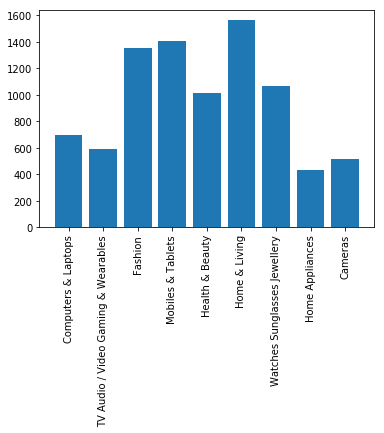

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.bar(range(len(SG_Products)),
        SG_Products.values(),
        align = 'center')
plt.xticks(range(len(SG_Products)),
          SG_Products.keys(),
          rotation = 'vertical')


### Practice 5
#### Question 1
Apply what you've learnt from the example for the products from <b>Malaysia</b>.

([<matplotlib.axis.XTick at 0x10a55c4e0>,
 <a list of 9 Text xticklabel objects>)

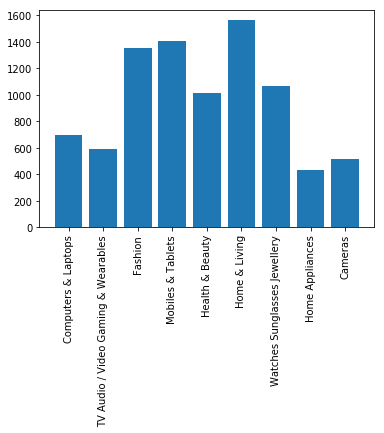

In [13]:
#Write your code below
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.bar(range(len(MY_Products)),
        SG_Products.values(),
        align = 'center')
plt.xticks(range(len(MY_Products)),
          SG_Products.keys(),
          rotation = 'vertical')



#### Question 2
Apply what you've learnt from the example for the products from <b>Phillippines</b>.

([<matplotlib.axis.XTick at 0x11e8eb240>,
 <a list of 9 Text xticklabel objects>)

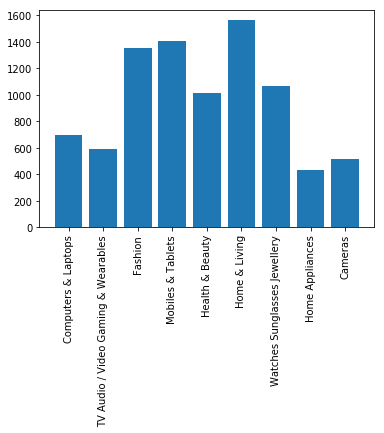

In [49]:
#Write your code below
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.bar(range(len(PH_Products)),
        SG_Products.values(),
        align = 'center')
plt.xticks(range(len(PH_Products)),
          SG_Products.keys(),
          rotation = 'vertical')

### Clustered Bar Charts
A good tool for comparing between categories side-by-side and distinguished by individual categories would be to use clustered bar charts. Below is an example done for you.

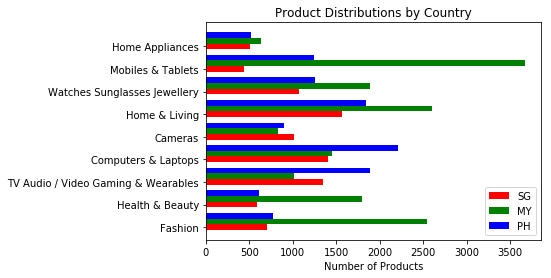

In [51]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N = 9 
ind = np.arange(N)  
width = 0.25       

fig, ax = plt.subplots()

rects1 = ax.barh(ind, 
                 list(SG_Products.values()), 
                 width,   color='r')
rects2 = ax.barh(ind+width,  list(MY_Products.values()),width,  color='g')
rects3 = ax.barh(ind+width+width, list(PH_Products.values()),width, color='b')


ax.set_xlabel('Number of Products')
ax.set_title('Product Distributions by Country')
ax.set_yticks(ind)
ax.set_yticklabels(MY_Products.keys(),rotation='horizontal')

ax.legend((rects1[0], rects2[0],rects3[0]), ('SG', 'MY', 'PH'))

plt.show()

### Practice 6
Using what we've learnt earlier, let's apply this to another question, this time using the `ax.bar()` instead. 

<b>Let's compare between countries, the number of products for `Female` and `Male`, distinguished by country.</b>

<b>Expected Output:</b>

<img src="https://i.imgur.com/H26KoLL.png">

{'sg': 941, 'my': 1763, 'ph': 1240}
{'sg': 367, 'my': 700, 'ph': 542}


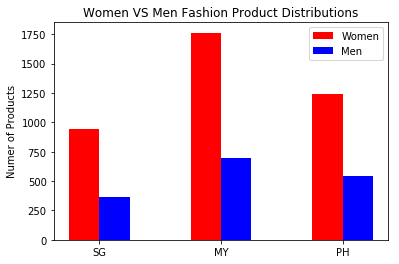

In [61]:
Women_Product_Counts = {'sg':0,'my':0,'ph':0}
Men_Product_Counts = {'sg':0,'my':0,'ph':0}

for product in lazada_data:
    if product['country'] == 'sg' and product['category_lvl_1']=='Fashion':
        if product['category_lvl_2']=='Women':
            Women_Product_Counts['sg'] = Women_Product_Counts['sg'] + 1
        elif product['category_lvl_2']=='Men':
            Men_Product_Counts['sg'] = Men_Product_Counts['sg'] + 1
    elif product['country'] == 'my' and product['category_lvl_1']=='Fashion':
        if product['category_lvl_2']=='Women':
            Women_Product_Counts['my'] = Women_Product_Counts['my'] + 1
        elif product['category_lvl_2']=='Men':
            Men_Product_Counts['my'] = Men_Product_Counts['my'] + 1
    elif product['country'] == 'ph' and product['category_lvl_1']=='Fashion':
        if product['category_lvl_2']=='Women':
            Women_Product_Counts['ph'] = Women_Product_Counts['ph'] + 1
        elif product['category_lvl_2']=='Men':
            Men_Product_Counts['ph'] = Men_Product_Counts['ph'] + 1

print(Women_Product_Counts)
print(Men_Product_Counts)

#========== Plot the charts ============
N = 3 
ind = np.arange(N)  
width = 0.25      

fig, ax = plt.subplots()

rects1 = ax.bar(ind, Women_Product_Counts.values(), width, color='r')
rects2 = ax.bar(ind+width, Men_Product_Counts.values(), width, color='b')



ax.set_ylabel('Numer of Products')
ax.set_title('Women VS Men Fashion Product Distributions')
ax.set_xticks([0.125,1.125,2.125])
ax.set_xticklabels(['SG','MY','PH'])
ax.legend((rects1[0], rects2[0]), ('Women', 'Men'))

plt.show()